<a href="https://colab.research.google.com/github/Maya-Borenko/Neural-Network/blob/main/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

In [3]:
batch_size=256
image_size=(224, 224)

In [4]:
train_dataset = image_dataset_from_directory('Neural-Network-Training/Training',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 120 files belonging to 4 classes.
Using 108 files for training.


In [5]:
validation_dataset = image_dataset_from_directory('Neural-Network-Training/Training',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 120 files belonging to 4 classes.
Using 12 files for validation.


In [6]:
class_names = train_dataset.class_names
class_names

['Earth', 'Moon', 'Saturn', 'Sun']

In [7]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
base_layers.trainable = False

In [8]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [9]:
model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=2)

Epoch 1/5
1/1 - 8s - loss: 1.0580 - accuracy: 0.2593 - val_loss: 0.4393 - val_accuracy: 0.2500 - 8s/epoch - 8s/step
Epoch 2/5
1/1 - 4s - loss: 0.6185 - accuracy: 0.2778 - val_loss: -2.8576e-01 - val_accuracy: 0.1667 - 4s/epoch - 4s/step
Epoch 3/5
1/1 - 4s - loss: 0.2230 - accuracy: 0.2870 - val_loss: -9.4624e-01 - val_accuracy: 0.1667 - 4s/epoch - 4s/step
Epoch 4/5
1/1 - 4s - loss: -9.3707e-02 - accuracy: 0.2870 - val_loss: -1.5506e+00 - val_accuracy: 0.0833 - 4s/epoch - 4s/step
Epoch 5/5
1/1 - 4s - loss: -2.9004e-01 - accuracy: 0.2778 - val_loss: -2.1111e+00 - val_accuracy: 0.0833 - 4s/epoch - 4s/step


In [10]:
SIZE = 224
def resize_img(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (SIZE, SIZE))
  img = img/225.0
  return img, label

In [11]:
test_dataset = image_dataset_from_directory('Neural-Network-Training/Test',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 39 files belonging to 4 classes.


In [12]:
test_dataset.class_names

['Earth', 'Moon', 'Saturn', 'Sun']

In [23]:
scores = model.evaluate(test_dataset, verbose=1)

1/1 [==============================] - 2s 2s/step - loss: -0.8012 - accuracy: 0.2564


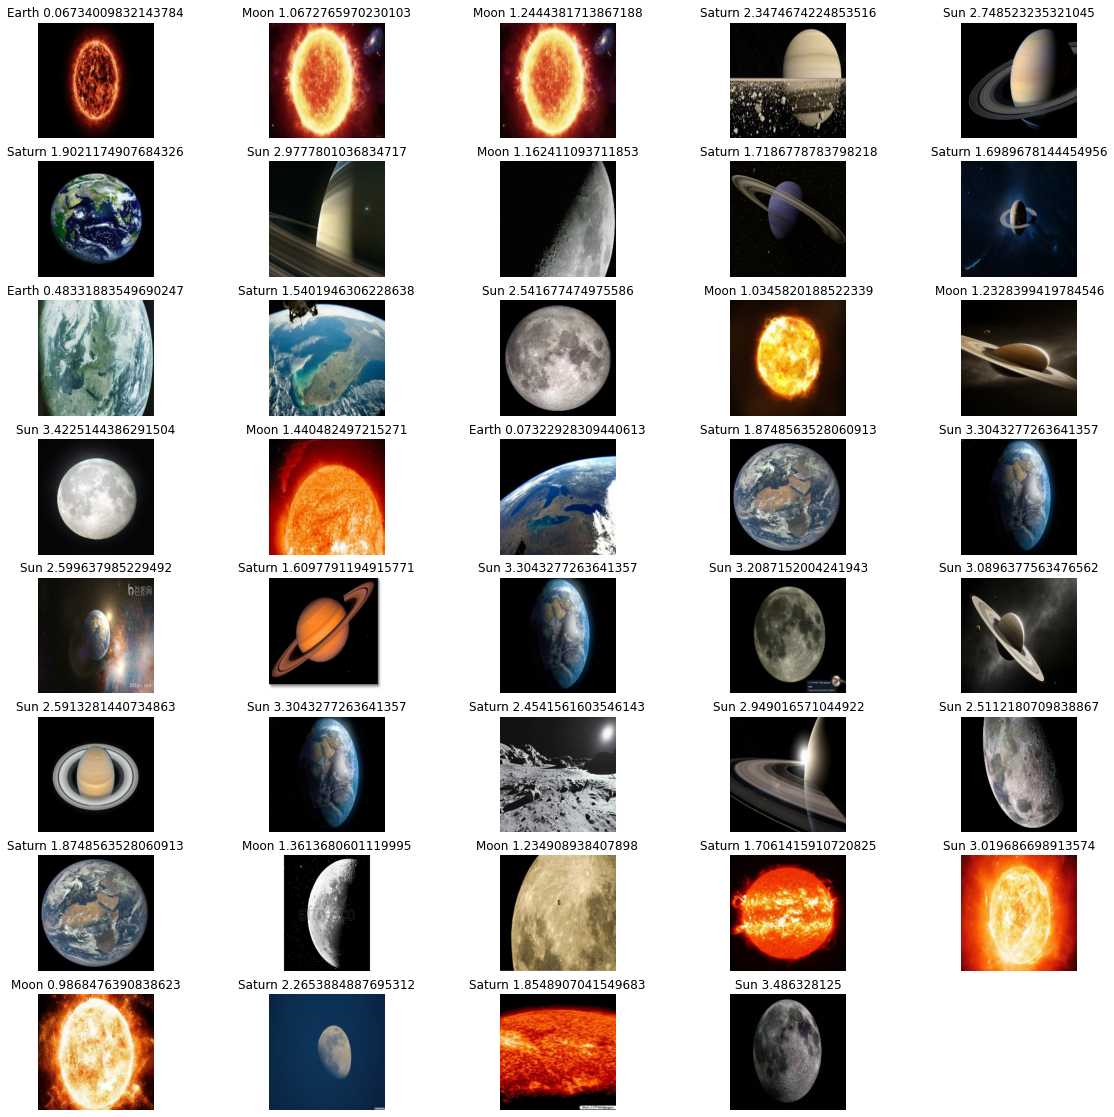

In [32]:
plt.figure(figsize=(20, 20))
for images, labels in test_dataset.take(1):

  for i in range(len(images)):
    input_arr = img_to_array(images[i])
    img_resized, _ = resize_img(input_arr, _)
    input_arr = np.expand_dims(img_resized, axis=0)
    predictions = model.predict(input_arr)[0][0]
    ax = plt.subplot(8, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f'{test_dataset.class_names[round(predictions)]} {predictions}')
    plt.axis("off")